***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2019***


Credits: The data imports and normalisation code snippets were extracted from https://www.datacamp.com/community/tutorials/keras-r-deep-learning

## Download Keras

In [1]:
devtools::install_github("rstudio/keras")

reticulate (NA -> 1.13  ) [CRAN]
tensorflow (NA -> 1.14.0) [CRAN]
tfruns     (NA -> 1.4   ) [CRAN]
config     (NA -> 0.3   ) [CRAN]


Installing 4 packages: reticulate, tensorflow, tfruns, config
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


✔  checking for file ‘/tmp/Rtmp87DtSY/remotes8363e6f51f/rstudio-keras-59fc325/DESCRIPTION’
─  preparing ‘keras’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (482ms)
─  checking for empty or unneeded directories
   Removed empty directory ‘keras/man-roxygen’
─  building ‘keras_2.2.4.1.9001.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


## Import the Keras library

In [0]:
library(keras)

## Read in `iris` data

In [0]:
iris <- read.csv(url("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"), header = FALSE) 

## Return the first part of `iris`

In [4]:
head(iris)

V1,V2,V3,V4,V5
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


## Inspect the structure

In [5]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ V1: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ V2: num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ V3: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ V4: num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ V5: Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


## Obtain the dimensions

In [6]:
dim(iris)

[1] 150   5

## Plot the data points

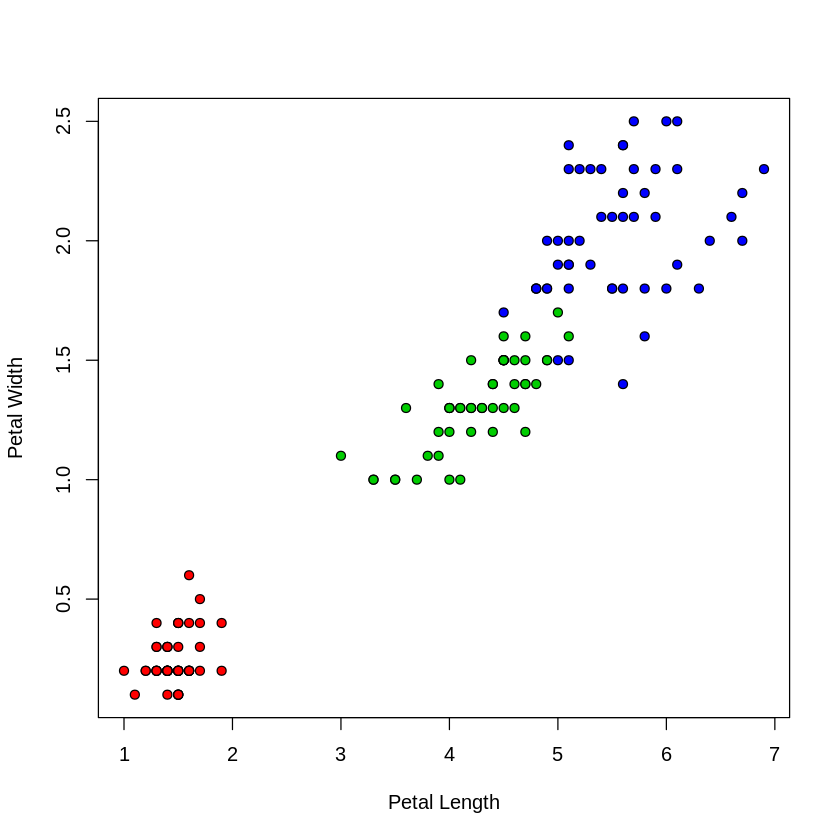

In [7]:
names(iris) <- c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Species")

plot(iris$Petal.Length, 
     iris$Petal.Width, 
     pch=21, bg=c("red","green3","blue")[unclass(iris$Species)], 
     xlab="Petal Length", 
     ylab="Petal Width")

In [0]:
iris[,5] <- as.numeric(iris[,5]) -1

# Turn `iris` into a matrix
iris <- as.matrix(iris)

# Set iris `dimnames` to `NULL`
dimnames(iris) <- NULL

## Check the dimensions

In [9]:
dim(iris)

[1] 150   5

## Normalize the `iris` data

In [0]:
iris_features <- scale(iris[,1:4])
iris_target <- iris[,5]

## Return the summary of `iris`

In [11]:
summary(iris_features)

       V1                 V2                V3                V4         
 Min.   :-1.86378   Min.   :-2.4308   Min.   :-1.5635   Min.   :-1.4396  
 1st Qu.:-0.89767   1st Qu.:-0.5858   1st Qu.:-1.2234   1st Qu.:-1.1776  
 Median :-0.05233   Median :-0.1245   Median : 0.3351   Median : 0.1328  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.67225   3rd Qu.: 0.5674   3rd Qu.: 0.7602   3rd Qu.: 0.7880  
 Max.   : 2.48370   Max.   : 3.1043   Max.   : 1.7804   Max.   : 1.7052  

## Return the summary of `iris`

In [12]:
summary(iris_target)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       1       1       2       2 

## Split the data into training and testing

In [0]:
# Determine sample size
ind <- sample(2, nrow(iris), replace=TRUE, prob=c(0.67, 0.33))

# Split the `iris` data
x_train <- iris_features[ind==1, 1:4]
x_test <- iris_features[ind==2, 1:4]

# Split the class attribute
y_train <- iris_target[ind==1]
y_test <- iris_target[ind==2]

## Convert targets/labels to their one-hot encoded equivalent

In [0]:
y_train <- to_categorical(y_train)
y_test_original = y_test
y_test <- to_categorical(y_test)

## Check dimensions of tagets

In [15]:
dim(y_train)

[1] 95  3

## Define the model

In [0]:
model <- keras_model_sequential() 
model %>% 
    layer_dense(units = 8, activation = 'relu', input_shape = c(4)) %>% 
    layer_dropout(rate = 0.5) %>%
    layer_dense(units = 3, activation = 'softmax')

## Print out a summary of the network architecture

In [17]:
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 8)                       40          
________________________________________________________________________________
dropout (Dropout)                   (None, 8)                       0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 3)                       27          
Total params: 67
Trainable params: 67
Non-trainable params: 0
________________________________________________________________________________


## Compile the model.

We need to provide extra information to train the model. We need to specify the loss function, the optimiser and what metric to display to the user.

In [0]:
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_adam(lr = 0.01),
  metrics = c('accuracy'),
)

## Training the neural network

In [0]:
history <- model %>% fit(
  x_train, y_train, 
  epochs = 300, batch_size = 5, 
  validation_split = 0.2, shuffle = TRUE
)

## Plot the training performance.

When calling the fit function, Keras provides feedback of what happens to the loss during training. This is useful in determining if the model was over-fitting for example.

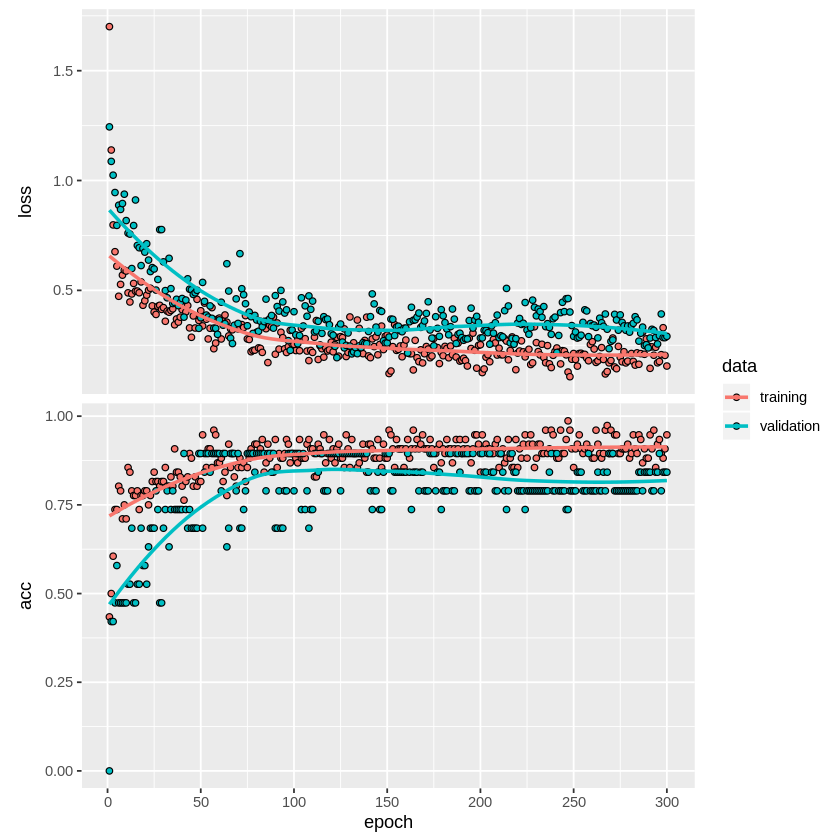

In [20]:
plot(history)

## Evaluate the performance on the test data

In [21]:
model %>% evaluate(x_test, y_test)

$loss
[1] 0.1306807

$acc
[1] 0.9272727

## Display confusion matrix

In [22]:
Y_test_hat <- predict_classes(model, x_test)
table(y_test_original, Y_test_hat)

               Y_test_hat
y_test_original  0  1  2
              0 21  0  0
              1  2 15  0
              2  0  2 15